<a href="https://colab.research.google.com/github/JAIdamodharan/text-summarization-nlp/blob/main/NEWSsummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEWS SUMMARIZATION PROJECT**
---

**Step 1**: Installing all libraries

In [ ]:
!pip install kaggle
!pip install transformers
!pip install pandas
!pip install torch

**Step 2**: Set up Kaggle API to download the dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaidam","key":"a273ab1aada0522cb64ac13fc81b7e29"}'}

**Step 3**: Create a kaggle folder and move the credentials

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Step 4**: Download the dataset from kaggle

In [ ]:
!kaggle datasets download -d nilanjandutta/tennis-articles

Dataset URL: https://www.kaggle.com/datasets/nilanjandutta/tennis-articles
License(s): unknown
  0% 0.00/7.88k [00:00<?, ?B/s]
100% 7.88k/7.88k [00:00<00:00, 17.1MB/s]


**Step 5**: unzip the dataset

In [ ]:
!unzip tennis-articles.zip

Archive:  tennis-articles.zip
  inflating: tennis_articles.csv     


**Step 6**: Import the libraries required

In [ ]:
import pandas as pd
from transformers import pipeline

**Step 7**: load the dataset into the pandas dataframe

In [ ]:
df = pd.read_csv('tennis_articles.csv', encoding = "ISO-8859-1")

**Step 8**: Check the structure of the dataset

In [ ]:
print(df.head())

   article_id                                      article_title  \
0           1  I do not have friends in tennis, says Maria Sh...   
1           2  Federer defeats Medvedev to advance to 14th Sw...   
2           3  Tennis: Roger Federer ignored deadline set by ...   
3           4  Nishikori to face off against Anderson in Vien...   
4           5  Roger Federer has made this huge change to ten...   

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP)  Roger Federer advanc...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                              source  
0  https://www.tennisworldusa.org/tennis/news/Mar...  
1  http://www.tennis.com/pro-game/2018/10/copil-s...  
2  https://scroll.in/field/899938/tennis-roger-fe...  
3  http://www.tennis.com/pro-game/

**Step 9**: Process the data
clean the (article) column for summarization -> PREPROCESSING

In [ ]:
def clean_text(text):
    text = text.replace('\n', ' ')  # Remove newlines
    text = ' '.join(text.split())   # Remove extra spaces
    return text

In [ ]:
print(df.columns)

Index(['article_id', 'article_title', 'article_text', 'source'], dtype='object')


**Step 10**: Apply this function to the article column of the dataset.

In [ ]:
df['cleaned_article'] = df['article_text'].apply(clean_text)

**Step 11**: Result after cleaning

In [ ]:
print(df[['article_text', 'cleaned_article']].head())

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP)  Roger Federer advanc...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                     cleaned_article  
0  Maria Sharapova has basically no friends as te...  
1  BASEL, Switzerland (AP)  Roger Federer advanc...  
2  Roger Federer has revealed that organisers of ...  
3  Kei Nishikori will try to end his long losing ...  
4  Federer, 37, first broke through on tour over ...  


In [ ]:
t

**Step 12**: Setting up Hugging face summarization pipeline

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**Step 13**: Summarize the articles

In [ ]:
df['summary'] = df['cleaned_article'].apply(lambda x: summarizer(x[:1024], max_length=150, min_length=50, do_sample=False)[0]['summary_text'])

**Step 14**: Display the output after summarization

In [ ]:
for i in range(8):  # total of 8 articles
    print(f"Original Article {i+1}:\n", df['cleaned_article'][i], "\n")
    print(f"Summary {i+1}:\n", df['summary'][i], "\n")
    print("="*100)

Original Article 1:
 Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just becaus

**Step 15**: Save the summarized article into a csv file

In [ ]:
df[['article_text', 'summary']].to_csv('summarized_articles.csv', index=False)

**Step 16**: Download the summarized file

In [ ]:
files.download('summarized_articles.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving summarized_articles.csv to summarized_articles (1).csv


**SPACY LIBRARY**



In [ ]:
import spacy
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function for text summarization
def text_summarizer(raw_docx):
    raw_text = raw_docx
    docx = nlp(raw_text)
    stopwords = list(STOP_WORDS)

    # Build Word Frequency
    word_frequencies = {}
    for word in docx:
        if word.text not in stopwords and word.text not in punctuation:
            if word.text.lower() not in word_frequencies:
                word_frequencies[word.text.lower()] = 1
            else:
                word_frequencies[word.text.lower()] += 1

    maximum_frequency = max(word_frequencies.values())

    # Normalize word frequencies
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word] / maximum_frequency)

    # Sentence Tokens
    sentence_list = [sentence for sentence in docx.sents]

    # Calculate Sentence Scores
    sentence_scores = {}
    for sent in sentence_list:
        for word in sent:
            if word.text.lower() in word_frequencies:
                if len(sent.text.split(' ')) < 30:  # Avoid overly long sentences
                    if sent not in sentence_scores:
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

    # Select the top N sentences
    summarized_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)
    final_sentences = [w.text for w in summarized_sentences]

    # Join the final summarized sentences
    summary = ' '.join(final_sentences)
    return summary

# Load the dataset (replace 'tennis_articles.csv' with your actual file path)
df = pd.read_csv('tennis_articles.csv', encoding="ISO-8859-1")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Apply the summarizer on each article in the 'article_text' column
summarized_articles = []
for article in df['article_text']:
    summarized_article = text_summarizer(article)
    summarized_articles.append(summarized_article)

# Add the summarized articles to the dataframe
df['summarized_article'] = summarized_articles

# Display the original and summarized articles
print(df[['article_title', 'article_text', 'summarized_article']].head())
output_file = 'tennis_articles_spacy_model_summarized.csv'
df.to_csv(output_file, index=False)
files.download(output_file)

   article_id                                      article_title  \
0           1  I do not have friends in tennis, says Maria Sh...   
1           2  Federer defeats Medvedev to advance to 14th Sw...   
2           3  Tennis: Roger Federer ignored deadline set by ...   
3           4  Nishikori to face off against Anderson in Vien...   
4           5  Roger Federer has made this huge change to ten...   

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP)  Roger Federer advanc...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                              source  
0  https://www.tennisworldusa.org/tennis/news/Mar...  
1  http://www.tennis.com/pro-game/2018/10/copil-s...  
2  https://scroll.in/field/899938/tennis-roger-fe...  
3  http://www.tennis.com/pro-game/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the spaCy and BART summarized articles
spacy_df = pd.read_csv('tennis_articles_spacy_model_summarized.csv', encoding="ISO-8859-1")
bart_df = pd.read_csv('summarized_articles.csv', encoding="ISO-8859-1")

# Merge both dataframes on 'article_text'
df = pd.merge(spacy_df[['article_text', 'summarized_article']],
              bart_df[['article_text', 'summary']],
              on='article_text',
              how='inner',
              suffixes=('_spacy', '_bart'))

# Display the first few rows to check the merged dataframe
print(df.head())

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP) Â Roger Federer advan...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                  summarized_article  \
0  I have friends that have completely different ...   
1  Copil upset expectations of a Federer final ag...   
2  Novak Djokovic has said he will give precedenc...   
3  The second-seeded Anderson defeated Fernando V...   
4  ÂI think I was misfiring the corners, I was n...   

                                             summary  
0  Maria Sharapova has basically no friends as te...  
1  Roger Federer beats seventh-seeded Daniil Medv...  
2  Roger Federer has revealed that organisers of ...  
3  Kei Nishikori faces Kevin Anderson in the fina...  
4  Roger Federer is chasing his 99th ATP title at..

**ROUGE SCORE comparision between spacy library and BART model**

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c96f070110443b5c1a882a3b00e2e26110bb9e5291ac61c67cd9b493b898ff8e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Function to compute ROUGE scores
def compute_rouge(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Apply ROUGE evaluation for both models
df['rouge_scores_spacy'] = df.apply(lambda row: compute_rouge(row['article_text'], row['summarized_article']), axis=1)
df['rouge_scores_bart'] = df.apply(lambda row: compute_rouge(row['article_text'], row['summary']), axis=1)

# Print out ROUGE scores for the first few articles
print(df[['article_text', 'rouge_scores_spacy', 'rouge_scores_bart']].head())

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP) Â Roger Federer advan...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                  rouge_scores_spacy  \
0  {'rouge1': (1.0, 0.34365325077399383, 0.511520...   
1  {'rouge1': (1.0, 0.6375, 0.7786259541984732), ...   
2  {'rouge1': (1.0, 0.43478260869565216, 0.606060...   
3  {'rouge1': (1.0, 0.631578947368421, 0.77419354...   
4  {'rouge1': (1.0, 0.3229166666666667, 0.4881889...   

                                   rouge_scores_bart  
0  {'rouge1': (1.0, 0.14551083591331268, 0.254054...  
1  {'rouge1': (1.0, 0.15, 0.2608695652173913), 'r...  
2  {'rouge1': (1.0, 0.1766304347826087, 0.3002309...  
3  {'rouge1': (0.9019607843137255, 0.186234817813...  
4  {'rouge1': (1.0, 0.12760416666666666, 0.226327..

In [ ]:
!pip install matplotlib rouge-score

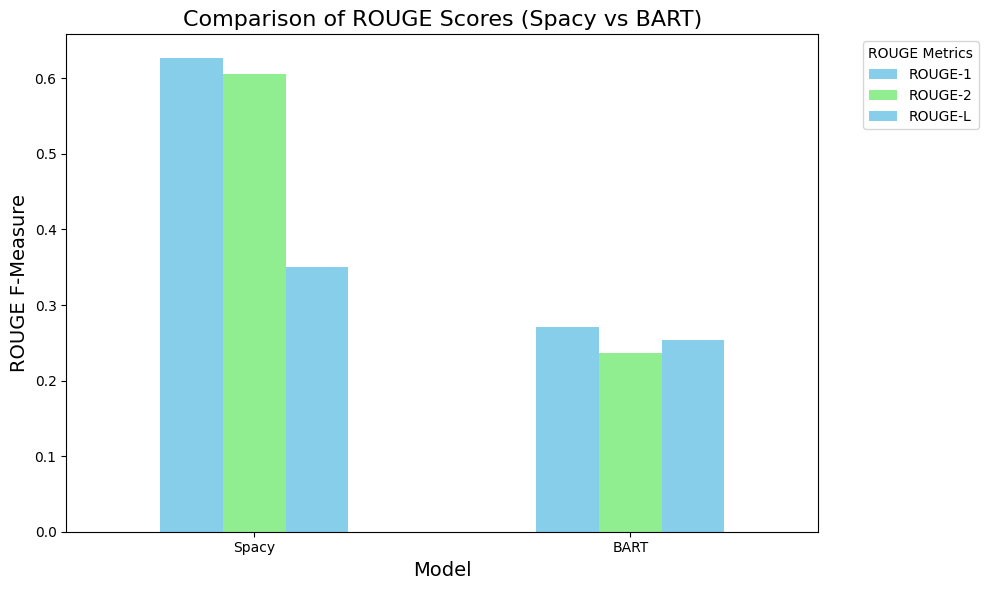

In [ ]:
from rouge_score import rouge_scorer
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute ROUGE scores
def compute_rouge(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure

# Load the dataframes
spacy_df = pd.read_csv('tennis_articles_spacy_model_summarized.csv', encoding="ISO-8859-1")
bart_df = pd.read_csv('summarized_articles.csv', encoding="ISO-8859-1")

# Initialize lists to store ROUGE scores
spacy_rouge1, spacy_rouge2, spacy_rougeL = [], [], []
bart_rouge1, bart_rouge2, bart_rougeL = [], [], []

# Iterate through Spacy dataframe and match articles based on 'article_text'
for _, spacy_row in spacy_df.iterrows():
    reference_text = spacy_row['article_text']
    spacy_summary = spacy_row['summarized_article']

    # Find the corresponding summary in the BART dataframe based on article_text
    bart_summary = bart_df.loc[bart_df['article_text'] == spacy_row['article_text'], 'summary'].values
    if len(bart_summary) > 0:
        bart_summary = bart_summary[0]  # There should be exactly one matching summary

        # Compute ROUGE scores for both Spacy and BART summaries
        spacy_r1, spacy_r2, spacy_rl = compute_rouge(reference_text, spacy_summary)
        bart_r1, bart_r2, bart_rl = compute_rouge(reference_text, bart_summary)

        # Append the scores to the lists
        spacy_rouge1.append(spacy_r1)
        spacy_rouge2.append(spacy_r2)
        spacy_rougeL.append(spacy_rl)

        bart_rouge1.append(bart_r1)
        bart_rouge2.append(bart_r2)
        bart_rougeL.append(bart_rl)

# Create a DataFrame for visualization
rouge_data = {
    'Model': ['Spacy', 'BART'],
    'ROUGE-1': [sum(spacy_rouge1)/len(spacy_rouge1), sum(bart_rouge1)/len(bart_rouge1)],
    'ROUGE-2': [sum(spacy_rouge2)/len(spacy_rouge2), sum(bart_rouge2)/len(bart_rouge2)],
    'ROUGE-L': [sum(spacy_rougeL)/len(spacy_rougeL), sum(bart_rougeL)/len(bart_rougeL)],
}

# Create a DataFrame for the ROUGE scores
rouge_df = pd.DataFrame(rouge_data)

# Plotting the ROUGE scores comparison
rouge_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparison of ROUGE Scores (Spacy vs BART)', fontsize=16)
plt.ylabel('ROUGE F-Measure', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="ROUGE Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

**NAMED ENTITY RECOGNITION**:
rule-based NER system using POS tagging

In [ ]:
import pandas as pd
import re
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Set up stop words
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def preprocess_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return tokens

# Function to identify potential entities with POS tagging
def identify_entities(tokens):
    pos_tags = pos_tag(tokens)
    entities = []
    for word, tag in pos_tags:
        if tag in ('NNP', 'NNPS'):  # Proper nouns
            entities.append(word)
    return entities

# Define dictionaries for known entities
names = ["Maria", "Sharapova", "Roger", "Federer", "Daniil", "Medvedev", "Marius", "Copil", "Kei", "Nishikori",
         "Kevin", "Anderson", "Fernando", "Verdasco", "Jan-Lennard", "Struff", "Nadal", "Juan", "Martin", "Del",
         "Porto", "Jack", "Sock", "Stefanos", "Tsitsipas", "Kyle", "Edmund", "Todd", "Reid", "Nick", "Bollettieri",
         "Andre", "Agassi", "Monica", "Seles", "Jim", "Courier", "Sargis", "Sargsian"]
locations = ["Switzerland", "Vienna", "Basel", "Paris", "London", "New York", "Barcelona", "Madrid", "Sydney"
             "Melbourne", "Dubai", "Indian Wells", "Miami", "Rome", "Tokyo", "Doha", "Halle",
             "Montpellier", "Cincinnati", "Los Angeles", "Beijing", "Stuttgart", "Berlin", "Montreal"]
organizations = ["ATP", "WTA", "ITF", "USTA", "LTA", "French Tennis Federation",
                 "Tennis Australia", "International Tennis Hall of Fame",
                 "Davis Cup", "Fed Cup", "Swiss Tennis", "German Tennis Federation",
                 "Rafael Nadal Academy", "Serena Williams Foundation",
                 "Novak Djokovic Foundation"]

# Function to categorize entities based on predefined lists
def categorize_entity(entity):
    if entity in names:
        return "PERSON"
    elif entity in locations:
        return "LOCATION"
    elif entity in organizations:
        return "ORGANIZATION"
    else:
        return "OTHER"

# Function to extract named entities from text
def extract_named_entities(text):
    tokens = preprocess_text(text)
    entities = identify_entities(tokens)

    categorized_entities = {}
    for entity in entities:
        category = categorize_entity(entity)
        if category != "OTHER":  # Only store identified categories
            if category not in categorized_entities:
                categorized_entities[category] = []
            categorized_entities[category].append(entity)

    return categorized_entities

df = pd.read_csv('summarized_articles.csv')
df['entities'] = df['summary'].apply(extract_named_entities)
df.to_csv('summarized_articles_with_entities.csv', index=False)
print(df[['summary', 'entities']])

                                             summary  \
0  Maria Sharapova has basically no friends as te...   
1  Roger Federer beats seventh-seeded Daniil Medv...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori faces Kevin Anderson in the fina...   
4  Roger Federer is chasing his 99th ATP title at...   
5  The world No 1 has not played since the US Ope...   
6  Tennis podcast co-hosts Nina Pantic and Irina ...   
7  Former Wimbledon junior champion was full of h...   

                                            entities  
0                 {'PERSON': ['Maria', 'Sharapova']}  
1  {'PERSON': ['Roger', 'Federer', 'Daniil', 'Med...  
2  {'PERSON': ['Roger', 'Federer'], 'LOCATION': [...  
3  {'PERSON': ['Kei', 'Nishikori', 'Kevin', 'Ande...  
4  {'PERSON': ['Roger', 'Federer', 'Struff'], 'OR...  
5  {'PERSON': ['Nadal', 'Fernando', 'Verdasco', '...  
6  {'PERSON': ['Jack', 'Sock'], 'ORGANIZATION': [...  
7                               {'PERSON': ['Reid']}  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
files.download('summarized_articles_with_entities.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>